In [9]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Input
from keras.models import Model

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence 

# 이미지 생성자
from keras.preprocessing.image import ImageDataGenerator

# VGG16 모델(이미 학습이 완료되어 있는 이미지 인식 모델)
from keras.applications import VGG16

# 전처리, 활성 함수 셋팅
from keras import optimizers

# 저장
import pickle

# 시간 모듈
import time

# 이미지 조작을 위한
from PIL import Image

import os, glob

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [10]:
# 결과 데이터 구성
root_dir = 'img/101_new'
a1 = os.walk(root_dir)
categories = list(a1)[0][1]
categories

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'BACKGROUND_Google',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

In [11]:
# 모델 복원
model2 = load_model('models/학습2.hdf5')
model2

In [12]:
# 예측할 이미지의 목록을 가져온다.
file_list = glob.glob('img/101_test/*')
file_list

['img/101_test\\1.jpg',
 'img/101_test\\2.jpg',
 'img/101_test\\3.jpg',
 'img/101_test\\4.jpg',
 'img/101_test\\5.jpg']

In [13]:
# 변경시킬 이미지 크기
image_w = 64
image_h = 64

In [14]:
# 입력 이미지를 전처리
X = []
files = []
for fname in file_list :
    img = Image.open(fname)
    img = img.convert('RGB')
    img = img.resize((image_w, image_h))
    in_data = np.asarray(img)
    X.append(in_data)
    files.append(fname)

In [15]:
X = np.array(X)

In [16]:
# 예측 결과를 가져온다.
a1 = model2.predict(X)
# 각 예측 결과중 가장 큰 값을 가지고 있는 곳의 인덱스를 가져온다.
# 각각의 확률 중에 가장 큰 값을 가져오라는 거임
a2 = np.argmax(a1, axis=1)
a2

array([ 1,  4, 94,  4,  0], dtype=int64)

In [17]:
print(files)

['img/101_test\\1.jpg', 'img/101_test\\2.jpg', 'img/101_test\\3.jpg', 'img/101_test\\4.jpg', 'img/101_test\\5.jpg']


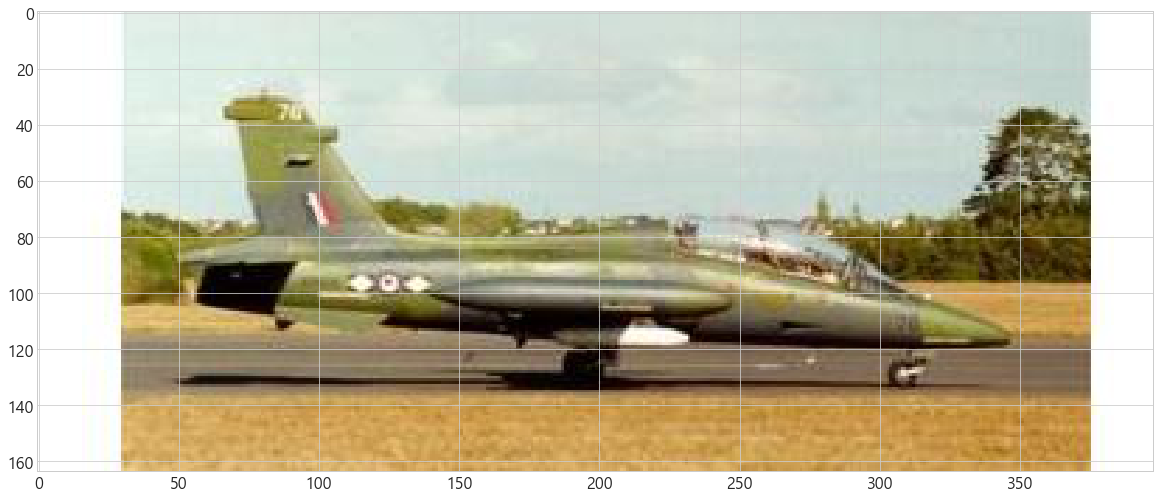

airplanes


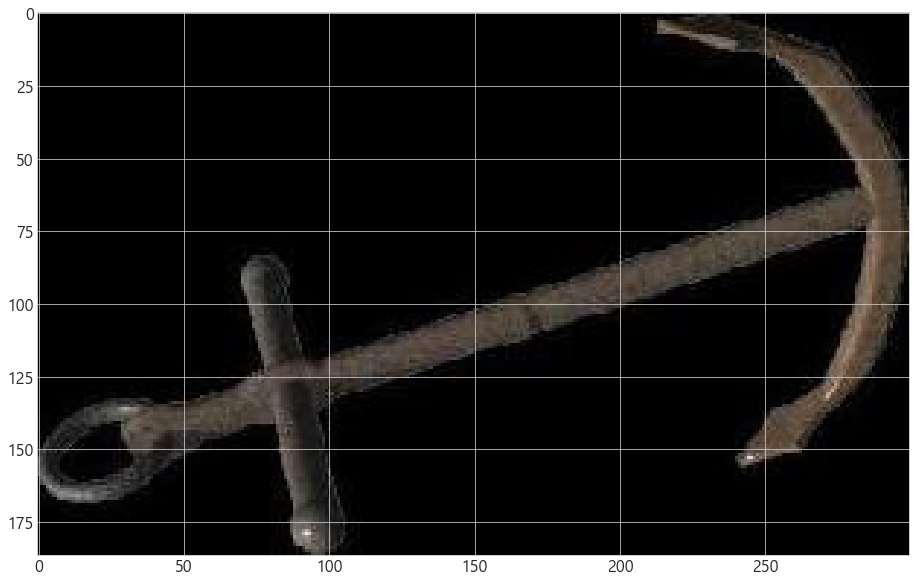

BACKGROUND_Google


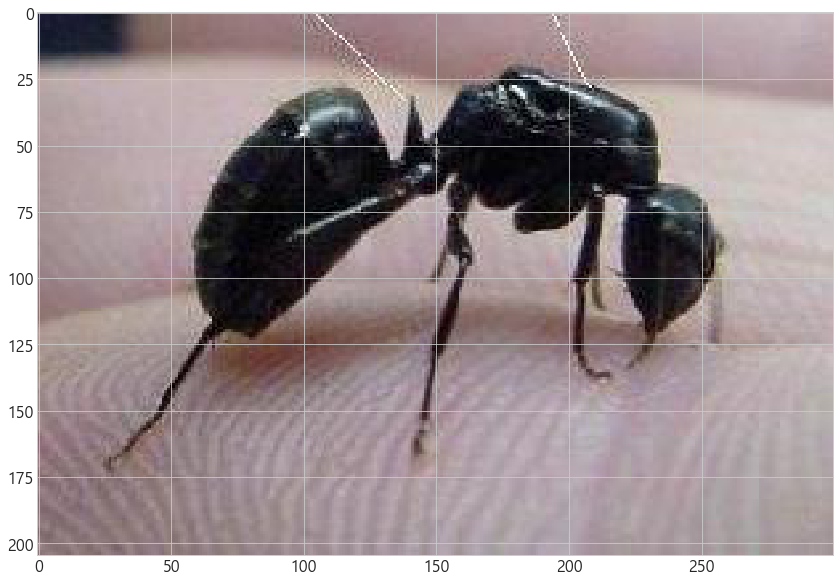

umbrella


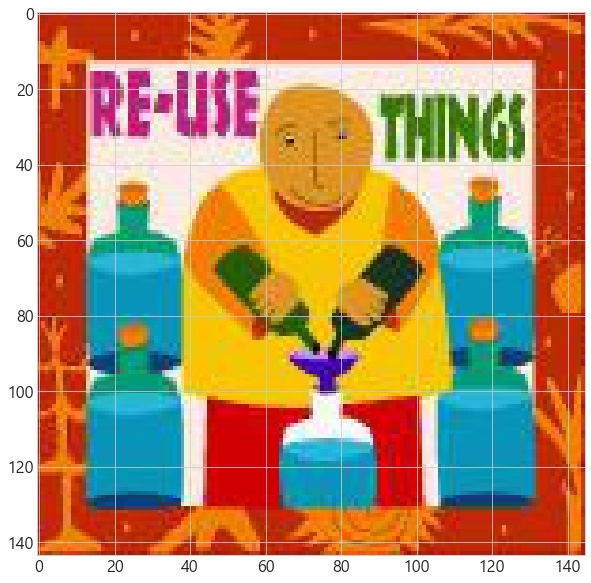

BACKGROUND_Google


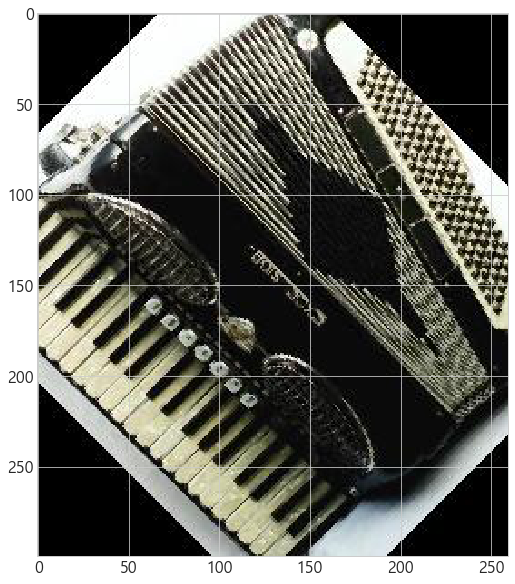

accordion


In [18]:
# 결과 확인
for i, fname in enumerate(files) :
    # 이미지를 불러온다.
    img = Image.open(fname)
    plt.imshow(img)
    plt.show()
    
    # 예측 결과를 추출한다.
    idx = a2[i]
    print(categories[idx])